<a href="https://colab.research.google.com/github/pragyan7/ML-projects/blob/main/Image_Classification_on_MNIST_or_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

**2. Load and explore the MNIST dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


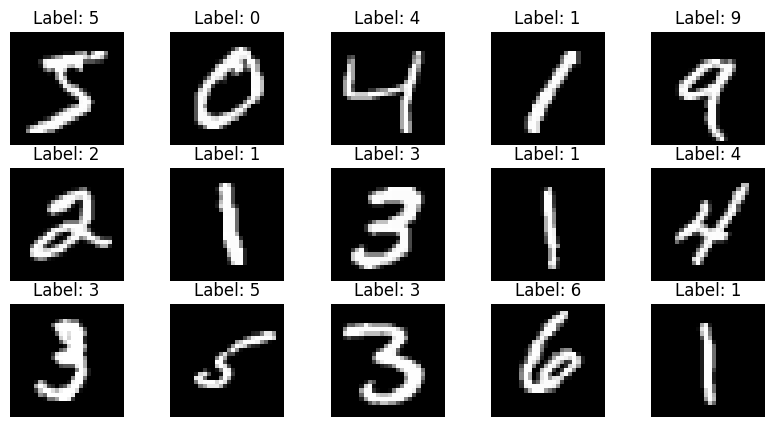

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

**3. Preprocess the data**

*   Normalize pixel values (0-255) to (0-1)
*   Add channel dimension

Convolution layers expect 4D input (batch, height, width, channels).
Even though the images are grayscale (single channel), they still need that dimension for the model to process correctly.
The syntax X_train[..., np.newaxis] means: keep all existing dimensions, and add a new axis at the end.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

**4. Build the CNN model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'), # no input_shape needed as this layer knows its input from the previous layer
    layers.MaxPooling2D((2, 2)), # Another max pooling to reduce data size further

    layers.Flatten(), # Converts 2D feature maps into a 1D vector
    layers.Dense(64, activation='relu'), # fully connected dense later with 64 neurons
    # uses ReLU activation to introduce non-linearity and help learn complex relationships
    layers.Dense(10, activation='softmax') # 10 classes for digits 0-9

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**5. Compile the model**

model.compile() sets up the model for training
*   Optimizer — how the model updates its weights
*   Loss function — how the model evaluates its errors
*   Metrics — what to monitor during training and evaluation

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**6. Train the model**

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.8996 - loss: 0.3335 - val_accuracy: 0.9857 - val_loss: 0.0525
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.9841 - loss: 0.0492 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 133s 45ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9887 - val_loss: 0.0427
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.9919 - loss: 0.0246 - val_accuracy: 0.9892 - val_loss: 0.0453
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9888 - val_loss: 0.0421


**7. Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9847 - loss: 0.0501
Test accuracy: 0.9877


**8. Plot training history**

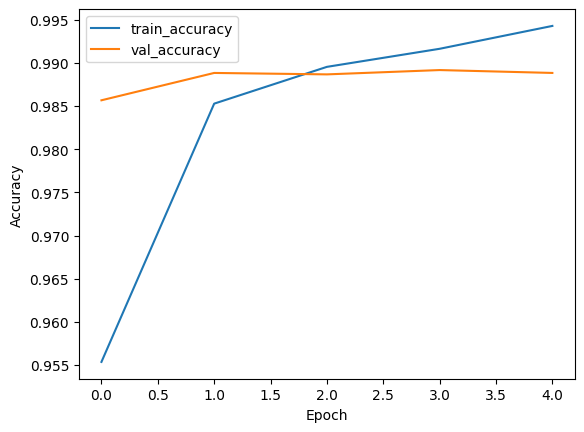

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**9. Predict and visulize some test images**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


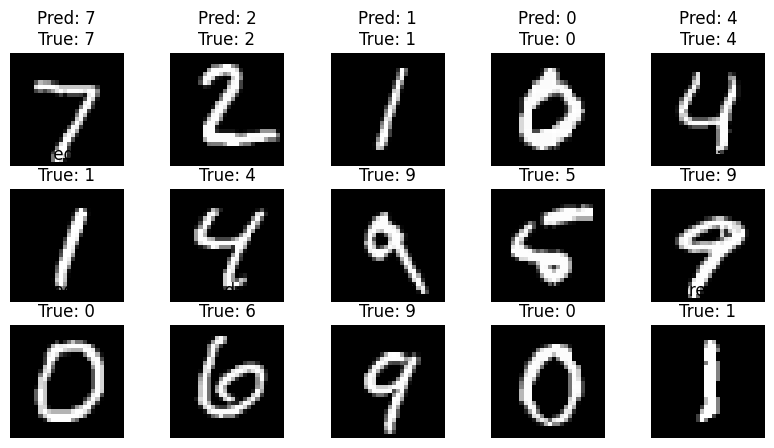

In [ ]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.show()